# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target'] = cancer.target
df['target_names'] = cancer.target_names[cancer.target]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [4]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','target_names'],axis='columns')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Scatter Plots 

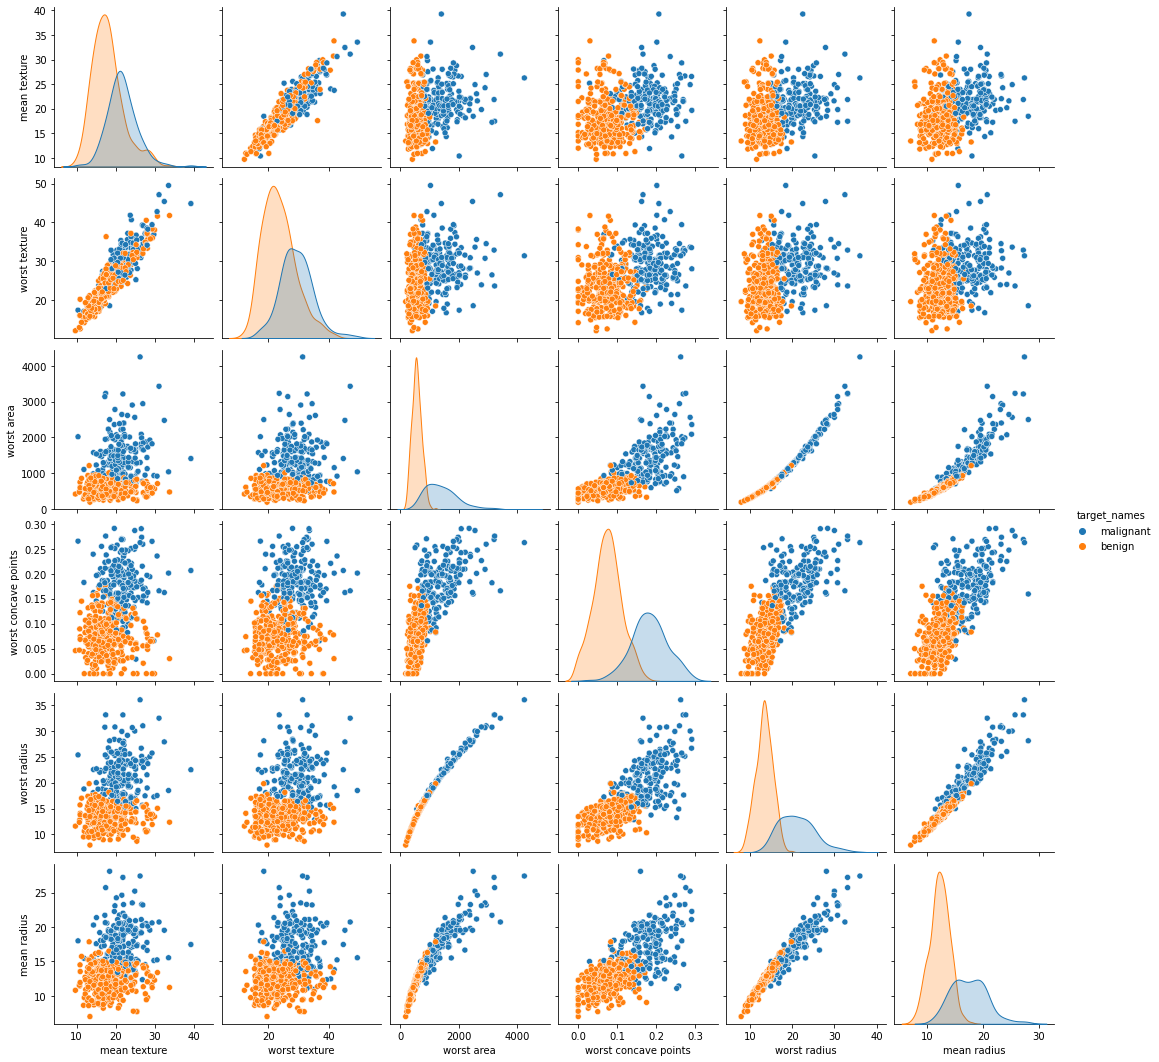

In [8]:
sns.pairplot(df[['mean texture', 'worst texture', 'worst area','worst concave points','worst radius','mean radius','target_names']],hue='target_names')


- In all the above scatter plots two categories can be separated

## Box Plots

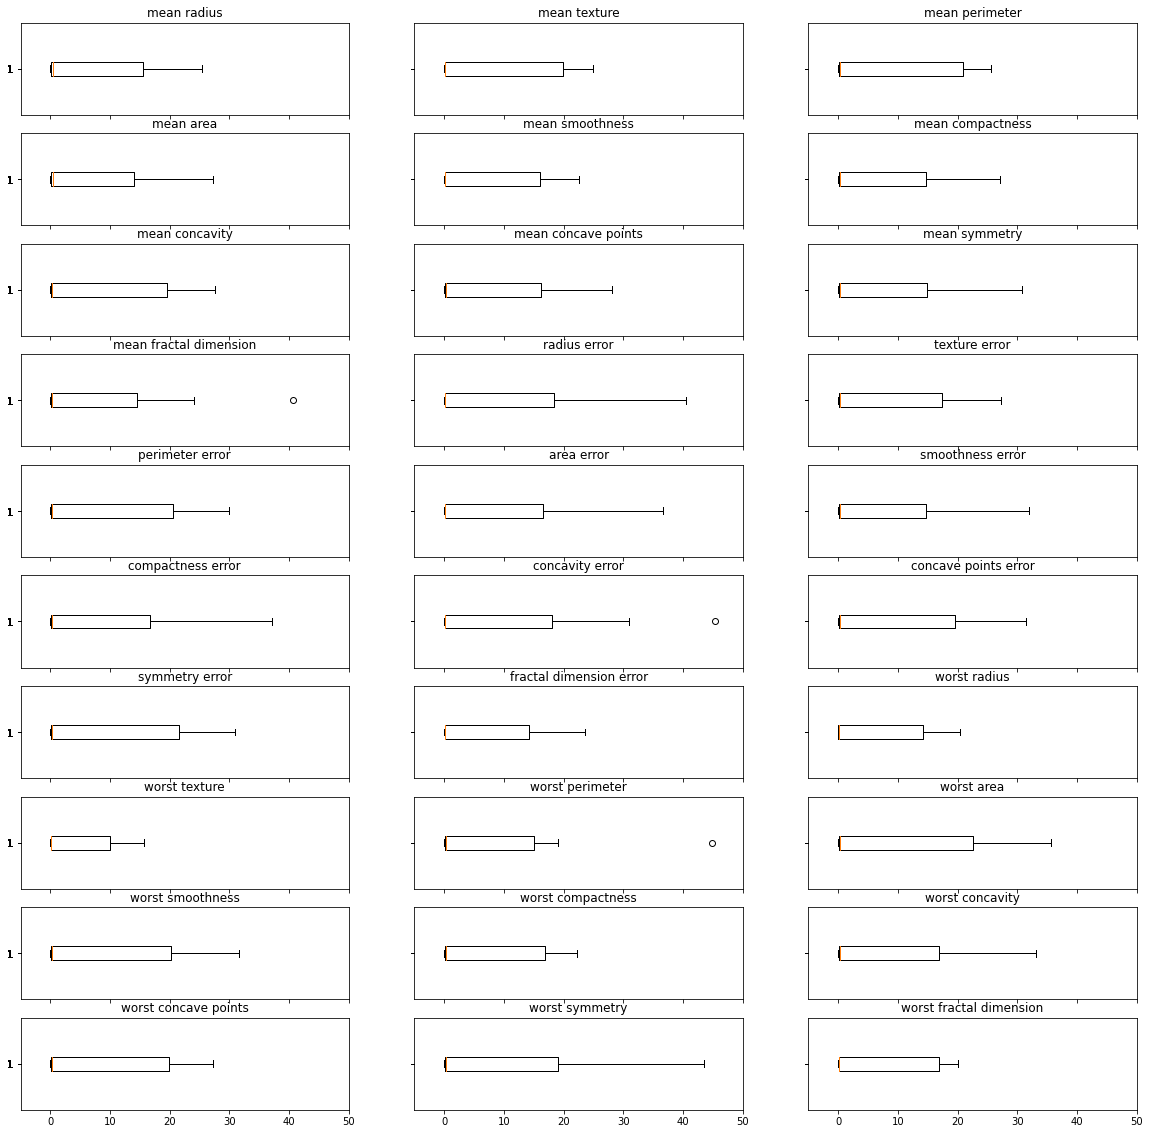

In [9]:
fig, axs = plt.subplots(10,3, figsize=(20, 20), sharex=True, sharey=True)

idx = 0
for i in range(10):
    for j in range(3):
        axs[i, j].boxplot(X.iloc[idx],vert=False)
        axs[i, j].set_title(X.columns[idx])
        axs[i, j].set_xlim([-5, 50])
        idx+=1

## Using StandardScaler to better view of bar plots

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df.drop(['target','target_names'],axis='columns'))

# Transform the data using the StandardScaler
scaled_df = scaler.transform(df.drop(['target','target_names'],axis='columns'))

# Converting into a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:-2])
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


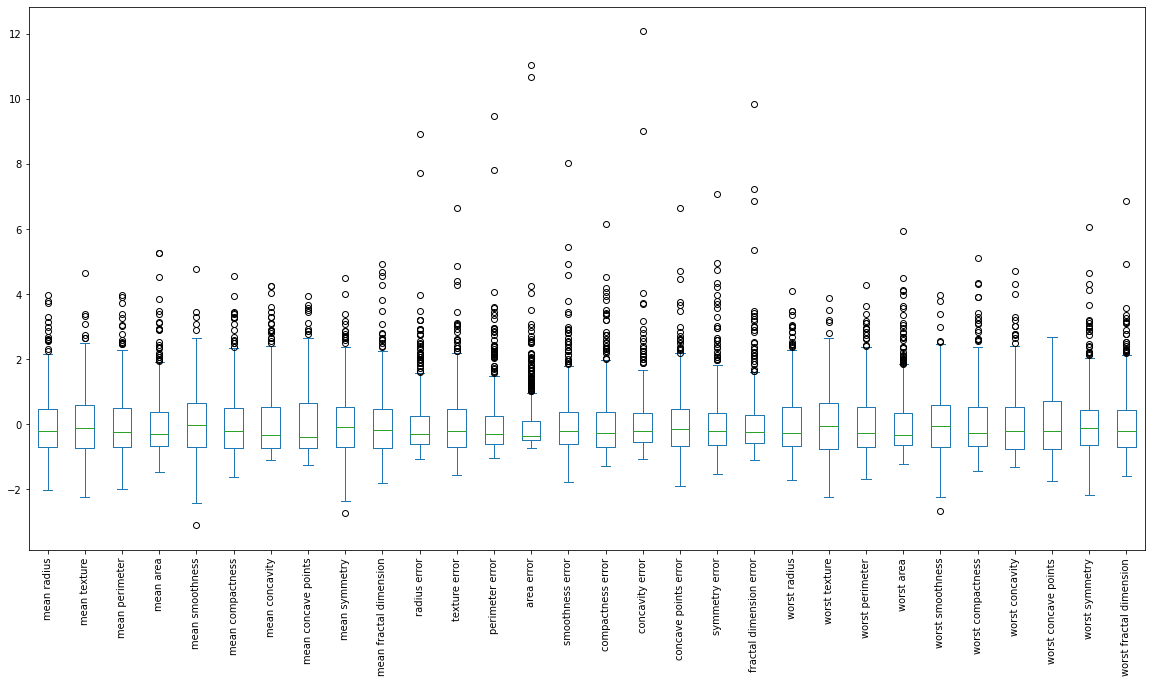

In [11]:
scaled_df.plot(kind='box',figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

# Decision Tree Model

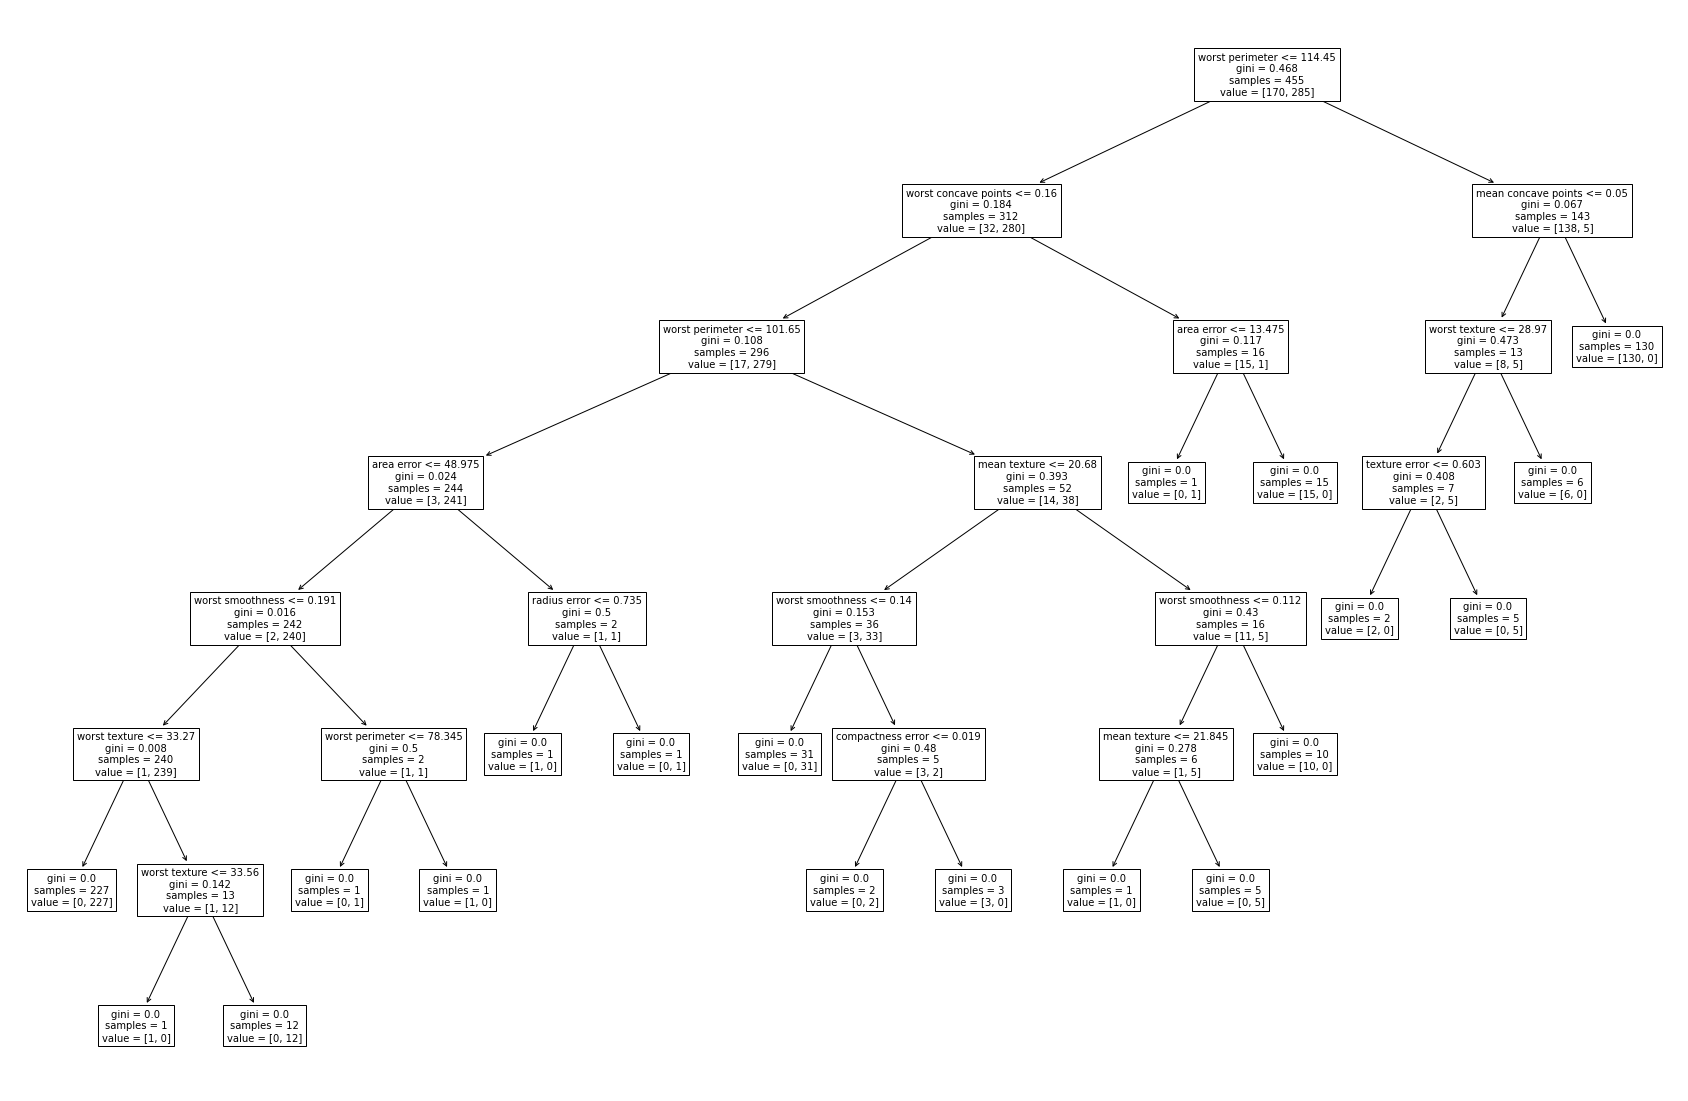

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cancer.feature_names,fontsize=10)
plt.show()

### Finding most prominant features for DecisionTreeClassifier

In [13]:
tree_model.feature_importances_ 

array([0.        , 0.04579678, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01641805, 0.        , 0.        ,
       0.00469556, 0.01341589, 0.        , 0.01330857, 0.        ,
       0.01126935, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02483187, 0.71626257, 0.        , 0.04359176,
       0.        , 0.        , 0.11040958, 0.        , 0.        ])

In [14]:
# the top freatures used by DecisionTreeClassifier 
tree_model.feature_names_in_[tree_model.feature_importances_ > 0.03]

array(['mean texture', 'worst perimeter', 'worst smoothness',
       'worst concave points'], dtype=object)

- Higher the gini score, the more weightage to the features

### Scores of DecisionTreeClassifier

In [15]:
from sklearn.metrics import classification_report
print('Scores on Testing Data\n')
predictions_test = tree_model.predict(X_test)
testing_score = classification_report(y_test, predictions_test)
print(testing_score)

Scores on Testing Data

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



## LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=3)
Lr.fit(X_train,y_train)


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

### Weights of the features  

In [17]:
Lr.coef_ 

array([[ 1.39212791,  0.38787826,  0.19093937, -0.00531756, -0.05825694,
        -0.25165225, -0.35552827, -0.1521963 , -0.07704371, -0.01397048,
         0.05673114,  0.40555036,  0.26036221, -0.09656532, -0.00812703,
        -0.05954231, -0.08100031, -0.02321345, -0.02245594, -0.0063918 ,
         1.36609786, -0.46074669, -0.27558079, -0.02398035, -0.10669001,
        -0.74513358, -0.94112146, -0.29827176, -0.24626607, -0.0719397 ]])

In [18]:
# the top features used by LogisticRegression
# displaying all the feature names with absloute weight greater than 0.6
Lr.feature_names_in_[abs(Lr.coef_)[0] > 0.6]

array(['mean radius', 'worst radius', 'worst compactness',
       'worst concavity'], dtype=object)

- Higher the absloute values of weights, the more weightage to the features

### Scores of LogisticRegression

In [19]:
print('Scores on Testing Data\n')
Lr_predictions_test = Lr.predict(X_test)
Lr_testing_score = classification_report(y_test, Lr_predictions_test)
print(Lr_testing_score)

Scores on Testing Data

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

Rf =  RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

### Scores for RandomForestClassifier

In [21]:
print('Scores on Testing Data\n')
Rf_predictions_test = Rf.predict(X_test)
Rf_testing_score = classification_report(y_test, Rf_predictions_test)
print(Rf_testing_score)

Scores on Testing Data

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



- RandomForestClassifier performed best among other ML algorithms 

## Applying GridSearchCV for RandomForestClassifier

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(Rf, param_grid=param_grid, cv=10)
grid_search.fit(X_train,y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score:  0.9604830917874396


### Scores of  RandomForestClassifier after applying GridSearchCV

In [23]:
print('Scores on Testing Data with grid search CV\n')
Rf_predictions_test_gcv = grid_search.predict(X_test)
Rf_testing_score_gcv = classification_report(y_test, Rf_predictions_test_gcv)
print(Rf_testing_score_gcv)

Scores on Testing Data with grid search CV

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



- GridSearchCv did not disturb the accuracy